# Denoising Notebook

In [1]:
import argparse
import time
import brainflow
import numpy as np

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from brainflow.board_shim import BoardShim, BrainFlowInputParams, LogLevels, BoardIds
from brainflow.data_filter import DataFilter, FilterTypes, AggOperations

In [2]:
# use synthetic board for demo
params = BrainFlowInputParams ()
board_id = BoardIds.SYNTHETIC_BOARD.value
board = BoardShim (board_id, params)
board.prepare_session ()
board.start_stream ()
time.sleep (20)
data = board.get_board_data ()
board.stop_stream ()
board.release_session ()

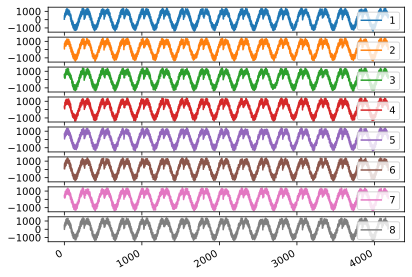

In [3]:
# plot original data
eeg_channels = BoardShim.get_eeg_channels (board_id)
df = pd.DataFrame (np.transpose (data))
df[eeg_channels].plot (subplots = True)
plt.show()

In [4]:
# demo for different denoising methods, 
# apply different methods to different channels to determine the best one
for count, channel in enumerate (eeg_channels):
    # first of all you can try simple moving median or moving average with different window size
    if count == 0:
        DataFilter.perform_rolling_filter (data[channel], 3, AggOperations.MEAN.value)
    elif count == 1:
        DataFilter.perform_rolling_filter (data[channel], 3, AggOperations.MEDIAN.value)
    # methods above should increase signal to noise ratio but we can do even better
    # using wavelet based denoising, feel free to try different wavelet functions and decomposition levels
    elif count == 2:
        DataFilter.perform_wavelet_denoising (data[channel], 'db6', 5)
    elif count == 3:
        DataFilter.perform_wavelet_denoising (data[channel], 'bior3.9', 5)
    elif count == 4:
        DataFilter.perform_wavelet_denoising (data[channel], 'sym7', 5)
    elif count == 5:
        DataFilter.perform_wavelet_denoising (data[channel], 'coif3', 5)
    elif count == 6:
        DataFilter.perform_wavelet_denoising (data[channel], 'bior6.8', 5)
    elif count == 7:
        DataFilter.perform_wavelet_denoising (data[channel], 'db4', 5)

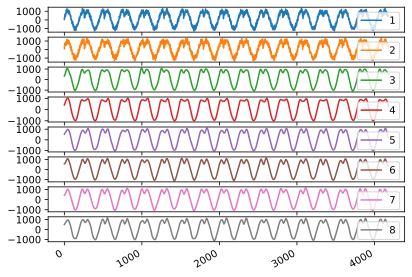

In [5]:
# plot denoised data
df = pd.DataFrame (np.transpose (data))
df[eeg_channels].plot (subplots = True)
plt.show()
# as you can see wavelet based denoising works much better and increases signal to noise ratio significantly!